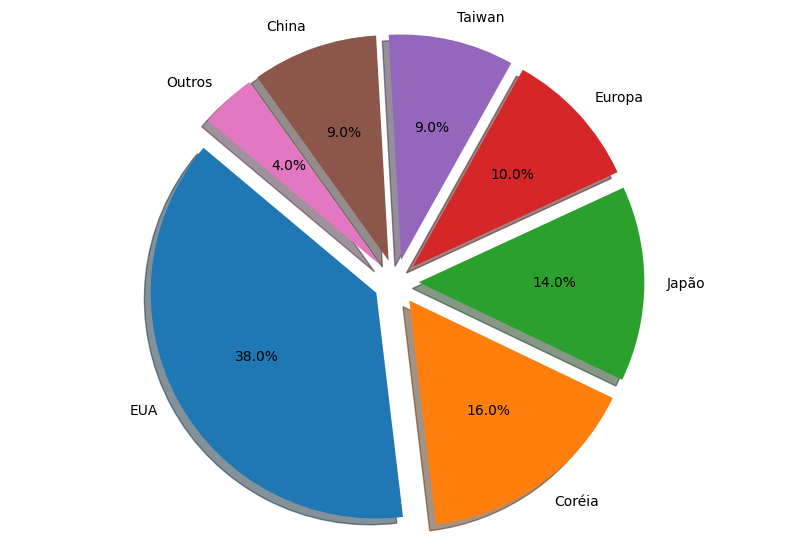

In [ ]:
import matplotlib.pyplot as plt

# Dados
labels = ["EUA", "Coréia", "Japão", "Europa", "Taiwan", "China", "Outros"]
sizes = [38, 16, 14, 10, 9, 9, 4]

# Paleta de cores acadêmica
academic_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2"]

# "Explodir" o gráfico
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10, 7))
ax.pie(sizes, explode=explode, labels=labels, colors=academic_colors, autopct='%1.1f%%', startangle=140, shadow=True)
ax.axis('equal')
plt.title("")
plt.show()


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Carregar os arquivos
balance_sheet_path = "/content/drive/MyDrive/Turim/Balance Sheet.csv"
cashflow_path = "/content/drive/MyDrive/Turim/Cashflow.csv"
data_center_path = "/content/drive/MyDrive/Turim/Data Center.xlsx"
income_statement_path = "/content/drive/MyDrive/Turim/Income Statement.csv"

balance_sheet = pd.read_csv(balance_sheet_path)
cashflow = pd.read_csv(cashflow_path)
income_statement = pd.read_csv(income_statement_path)
data_center = pd.read_excel(data_center_path)

# Consolidar as receitas trimestrais do Data Center em formato anual
data_center["FY24"] = data_center["Q2 FY24"] + data_center["Q1 FY24"]
data_center["FY23"] = data_center["Q4 FY23"] + data_center["Q3 FY23"] + data_center["Q2 FY23"] + data_center["Q1 FY23"]
data_center["FY22"] = data_center["Q4 FY22"] + data_center["Q3 FY22"]

# Extrair apenas as receitas anuais consolidadas do Data Center
annual_data_center_revenue = data_center[data_center["($ in millions)"] == "Data Center"][["FY24", "FY23", "FY22"]].T
annual_data_center_revenue.columns = ["Data Center Revenue"]

# Converter o index para uma coluna de anos e resetar o index
annual_data_center_revenue = annual_data_center_revenue.reset_index().rename(columns={"index": "Year"})

# Transformar os dados do Income Statement para um formato similar
income_statement_cleaned = income_statement.iloc[1:4, :].T
income_statement_cleaned.columns = income_statement_cleaned.iloc[0]
income_statement_cleaned = income_statement_cleaned.drop(income_statement_cleaned.index[0])
income_statement_cleaned = income_statement_cleaned.reset_index().rename(columns={"index": "Year"})

# Mapear os anos do formato "FYXX" para o formato "Jan-20XX"
year_mapping = {
    "FY24": "Jan-2024",
    "FY23": "Jan-2023",
    "FY22": "Jan-2022"
}
annual_data_center_revenue["Year"] = annual_data_center_revenue["Year"].map(year_mapping)

# Mesclar as receitas do Data Center com os dados do Income Statement
merged_data = pd.merge(income_statement_cleaned, annual_data_center_revenue, on="Year")

# Definir variáveis independentes (X) e dependentes (y)
X = merged_data[["Data Center Revenue"]].values
y = merged_data["Revenue"].astype(float).values

# Criar e treinar o modelo de regressão linear
model = LinearRegression().fit(X, y)

# Obter resultados
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

print(f"Coeficiente (inclinação): {slope}")
print(f"Interceptação (constante): {intercept}")
print(f"R^2: {r_squared}")


Coeficiente (inclinação): 6.8135362253007844e-06
Interceptação (constante): 26.871762888939365
R^2: 1.0
